In [1]:
library(arrow)
library(cowplot)
library(data.table)
library(dplyr)
library(finalfit)
library(ggplot2)
library(ggridges)
library(ggsci)
library(lubridate)
library(readxl)
library(stringr)
library(tidyverse)
require(plyr)
theme_set(theme_bw(base_size=16))
options(repr.plot.width=15, repr.plot.height=15)



Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp



Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following object is masked from ‘package:cowplot’:

    stamp


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching packages ───────────────── tidyverse 1.3.0 ──

✔ tibble  3.1.0     ✔ purrr   0.3.4
✔ tidyr   1.1.3     ✔ forcats 0.5.1
✔ readr   1.4.0     

── Conflicts ──────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ d

In [3]:
df

gender,age,count
<chr>,<chr>,<int>
F,1 some long string that is too long,26
M,1 some long string that is too long,21
F,10 some long string that is too long,25
M,10 some long string that is too long,26
F,11 some long string that is too long,18
M,11 some long string that is too long,36
F,12 some long string that is too long,10
M,12 some long string that is too long,24
F,13 some long string that is too long,21


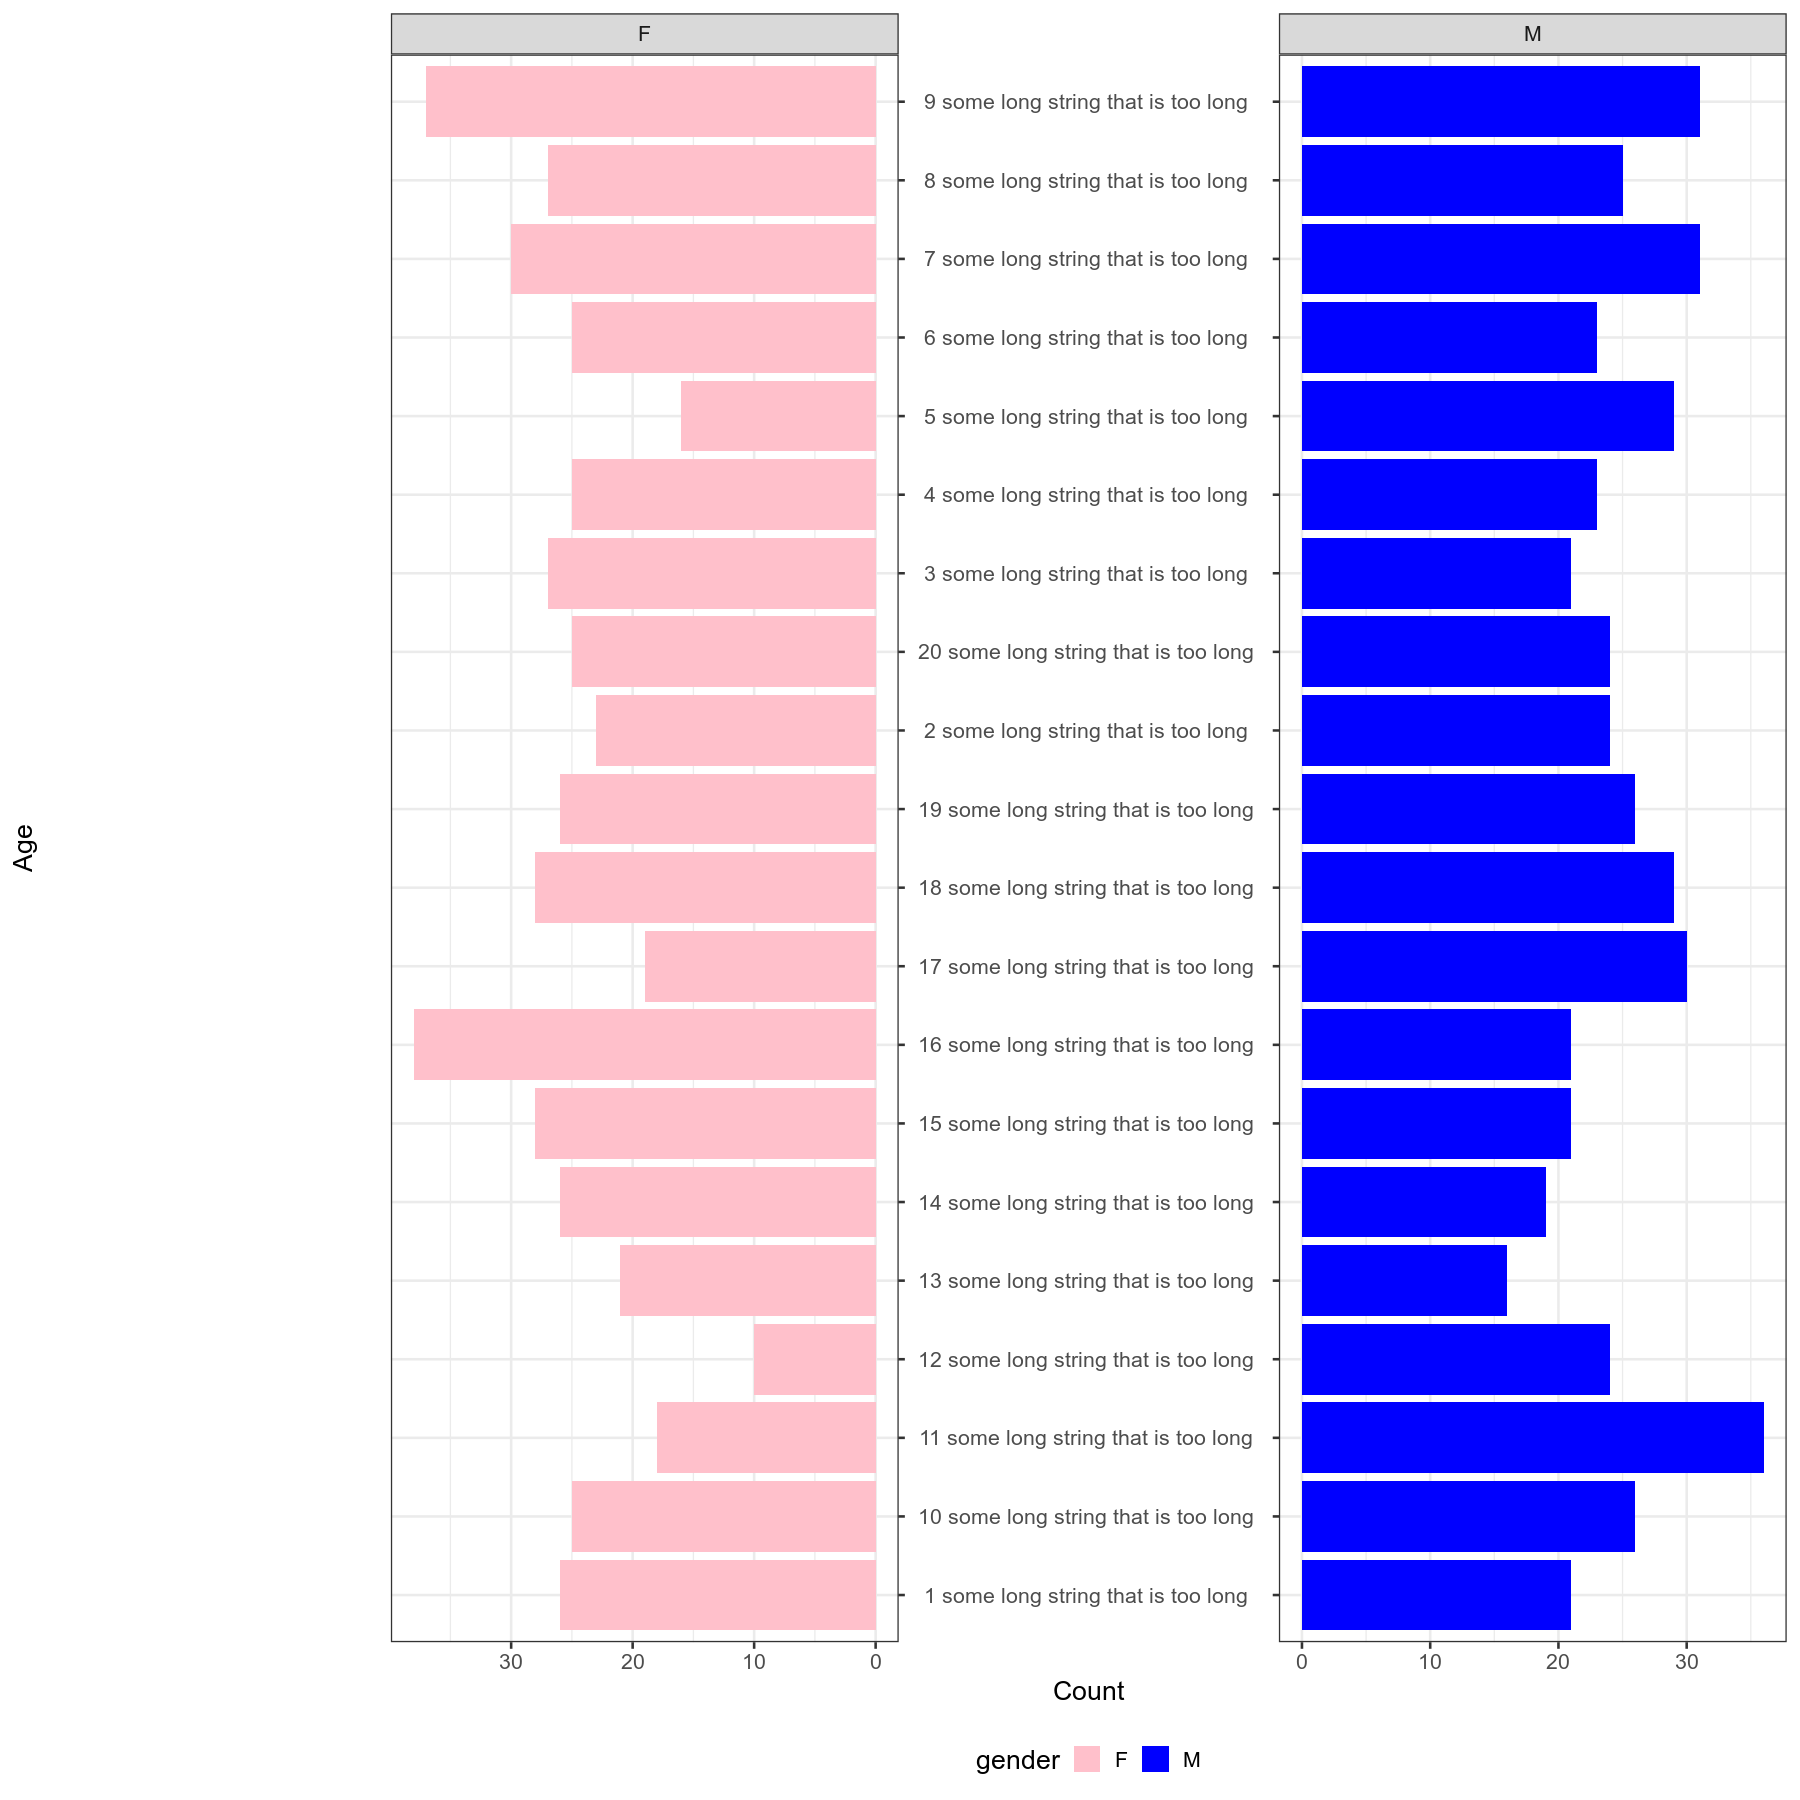

In [2]:
library(ggplot2)
library(ggpol)
df <- data.frame(age = sample(1:20, 1000, replace = TRUE), 
                 gender = c("M","F"), levels = c("M", "F"))

# Get the count per age and sex
df$count <- 1
df$age = paste(df$age, "some long string that is too long") # Added long labels
df <- aggregate(count ~ gender + age, data = df, length)

# For the horizontally shared axis, if we want to mirror the axes,
# we have to multiply the first panel by -1, and use coord_flip().
df_h <- df 
df_h$count = ifelse(df_h$gender == "F", df_h$count * -1, df_h$count)

p <- ggplot(df_h, aes(x = factor(age), y = count, fill = gender)) + 
  geom_bar(stat = "identity") +
  facet_share(~gender, dir = "h", scales = "free", reverse_num = TRUE) + 
  coord_flip() +
  labs(x = "Age", y = "Count") + 
  theme(legend.position = "bottom") +   scale_fill_manual(values = c("pink", "blue"))


p

In [8]:
exotic <- read_parquet('/gstock/EXOTIC/data/EXOTIC/EXOTIC_modified_zscore_mean_prop_corrected.parquet')
exotic_up <- filter(exotic, (EXOTIC_up > 0.8))
exotic_down <- filter(exotic, (EXOTIC_down > 0.8))
exotic_down
# exotic_up %>% separate_rows('EXOTIC_tissues_up')
# exotic_down %>%  separate_rows('EXOTIC_tissues_down')


symbol,ensg,HGNC,Exon,Ratio_num,mRNA_nb,mRNA_nb_total,MAP,mean_proportion,Adipose - Subcutaneous,⋯,Vagina,Whole Blood,EXOTIC_down,EXOTIC_bins_down,EXOTIC_bins_lite_down,EXOTIC_tissues_down,EXOTIC_up,EXOTIC_bins_up,EXOTIC_bins_lite_up,EXOTIC_tissues_up
<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<ord>,<ord>,<list<character>>,<dbl>,<ord>,<ord>,<list<character>>
A2ML1,ENSG00000166535,23336,8995730-8995957,0.5000000,1,2,A2ML1_8995730-8995957,0.75064,0.5406600,⋯,0.5017500,0.54066002,0.8112266,0.8 - 0.85,0.8 - 0.9,Brain - Cerebellar Hemisphere,0.5406600,0.5 - 0.55,0.5 - 0.6,"Adipose - Subcutaneous , Adipose - Visceral (Omentum) , Adrenal Gland , Artery - Aorta , Artery - Coronary , Artery - Tibial , Breast - Mammary Tissue , Cells - Cultured fibroblasts , Cells - EBV-transformed lymphocytes , Colon - Sigmoid , Colon - Transverse , Esophagus - Gastroesophageal Junction, Esophagus - Muscularis , Fallopian Tube , Heart - Left Ventricle , Kidney - Cortex , Liver , Lung , Muscle - Skeletal , Pancreas , Small Intestine - Terminal Ileum , Spleen , Stomach , Thyroid , Whole Blood"
AATK,ENSG00000181409,21,79104861-79104885,0.5000000,1,2,AATK_79104861-79104885,0.47363,0.5114980,⋯,0.5002500,0.49925000,0.8177236,0.8 - 0.85,0.8 - 0.9,Cells - Cultured fibroblasts,0.5822459,0.55 - 0.6,0.5 - 0.6,Fallopian Tube
ABCB9,ENSG00000150967,50,123425354-123425542,0.6666667,2,3,ABCB9_123425354-123425542,0.57383,0.5092489,⋯,0.4967500,0.02855369,0.9714463,0.95 - 1.0,0.9 - 1.0,Whole Blood,0.6030046,0.6 - 0.65,0.6 - 0.7,Liver
ABI1,ENSG00000136754,11320,27044584-27044670,0.3888889,7,18,ABI1_27044584-27044670,0.62853,0.5044999,⋯,0.5119977,0.11993984,0.8800602,0.85 - 0.9,0.8 - 0.9,Whole Blood,0.6292498,0.6 - 0.65,0.6 - 0.7,Muscle - Skeletal
ABI2,ENSG00000138443,24011,204193238-204193354,0.5000000,2,4,ABI2_204193238-204193354,0.76137,0.4992500,⋯,0.5000000,0.48325626,0.8864519,0.85 - 0.9,0.8 - 0.9,Cells - EBV-transformed lymphocytes,0.5277215,0.5 - 0.55,0.5 - 0.6,Brain - Putamen (basal ganglia)
ABI2,ENSG00000138443,24011,204231694-204231767,0.2500000,1,4,ABI2_204231694-204231767,0.76137,0.4992500,⋯,0.5000000,0.48325626,0.8864519,0.85 - 0.9,0.8 - 0.9,Cells - EBV-transformed lymphocytes,0.5277215,0.5 - 0.55,0.5 - 0.6,Brain - Putamen (basal ganglia)
ABI2,ENSG00000138443,24011,204276008-204276094,0.2500000,1,4,ABI2_204276008-204276094,0.67718,0.4992500,⋯,0.5007500,0.48050988,0.8300526,0.8 - 0.85,0.8 - 0.9,Liver,0.5478531,0.5 - 0.55,0.5 - 0.6,Brain - Putamen (basal ganglia)
ACSL5,ENSG00000197142,16526,114154705-114154860,0.5000000,1,2,ACSL5_114154705-114154860,0.83088,0.5002500,⋯,0.5005000,0.49950000,0.9668820,0.95 - 1.0,0.9 - 1.0,Testis,0.5741980,0.55 - 0.6,0.5 - 0.6,Cells - Cultured fibroblasts
ACY1,ENSG00000243989,177,52019223-52019287,0.6666667,2,3,ACY1_52019223-52019287,0.51483,0.5072495,⋯,0.4960001,0.51249740,0.8028179,0.8 - 0.85,0.8 - 0.9,Brain - Cerebellar Hemisphere,0.6208129,0.6 - 0.65,0.6 - 0.7,Muscle - Skeletal


In [6]:
df <- read_excel('/gstock/EXOTIC/data/EXOTIC/EXOTIC_up_Rdata.xlsx')
df <- df[df$EXOTIC_up > 0.8, ]
nrow(df)
colnames(df) <- c('Tissue', 'EXOTIC_max', 'symbol', 'MAP')

count_exons <- ddply(df, .(Tissue), mutate, count = length(unique(MAP)))
count_exons = unique(count_exons[,c("Tissue", "count")])
count_genes <- ddply(df, .(Tissue), mutate, count = length(unique(symbol)))
count_genes = unique(count_genes[,c("Tissue", "count")])
count <- merge(count_exons, count_genes, by='Tissue')
count_max <- count[count$count.x > 2, ]
count_max$Type = 'Up ↗ (EXOTIC-up > 0.8)'

[1] 1970

In [5]:
df <- read_excel('/gstock/EXOTIC/data/EXOTIC/EXOTIC_max_Rdata.xlsx')

colnames(df) <- c('Tissue', 'EXOTIC_max', 'symbol', 'MAP')

count_exons <- ddply(df, .(Tissue), mutate, count = length(unique(MAP)))
count_exons = unique(count_exons[,c("Tissue", "count")])
count_genes <- ddply(df, .(Tissue), mutate, count = length(unique(symbol)))
count_genes = unique(count_genes[,c("Tissue", "count")])
count <- merge(count_exons, count_genes, by='Tissue')
count_max <- count[count$count.x > 2, ]
count_max$Type = 'Up ↗ (EXOTIC-max > 0.9)'

In [7]:
df <- read_excel('/gstock/EXOTIC/data/EXOTIC/EXOTIC_down_Rdata.xlsx')
df <- df[df$EXOTIC_down > 0.8, ]
nrow(df)

colnames(df) <- c('Tissue', 'EXOTIC_max', 'symbol', 'MAP')

count_exons <- ddply(df, .(Tissue), mutate, count = length(unique(MAP)))
count_exons = unique(count_exons[,c("Tissue", "count")])
count_genes <- ddply(df, .(Tissue), mutate, count = length(unique(symbol)))
count_genes = unique(count_genes[,c("Tissue", "count")])
count <- merge(count_exons, count_genes, by='Tissue')
count_min <- count[count$count.x > 2, ]
count_min$count.x <- count_min$count.x * -1
count_min$Type = 'Down ↘ (EXOTIC-down > 0.8)'

[1] 2918

In [86]:
df <- read_excel('/gstock/EXOTIC/data/EXOTIC/EXOTIC_min_Rdata.xlsx')

colnames(df) <- c('Tissue', 'EXOTIC_max', 'symbol', 'MAP')

count_exons <- ddply(df, .(Tissue), mutate, count = length(unique(MAP)))
count_exons = unique(count_exons[,c("Tissue", "count")])
count_genes <- ddply(df, .(Tissue), mutate, count = length(unique(symbol)))
count_genes = unique(count_genes[,c("Tissue", "count")])
count <- merge(count_exons, count_genes, by='Tissue')
count_min <- count[count$count.x > 2, ]
count_min$count.x <- count_min$count.x * -1
count_min$Type = 'Down ↘ (EXOTIC-min < 0.1)'

In [10]:
merge_count <- rbind(count_max, count_min)
merge_count

,Tissue,count.x,count.y,Type
,<chr>,<dbl>,<int>,<chr>
1,Adipose - Subcutaneous,5,27,Up ↗ (EXOTIC-up > 0.8)
3,Adrenal Gland,4,4,Up ↗ (EXOTIC-up > 0.8)
4,Artery - Aorta,8,28,Up ↗ (EXOTIC-up > 0.8)
5,Artery - Coronary,5,22,Up ↗ (EXOTIC-up > 0.8)
6,Artery - Tibial,13,45,Up ↗ (EXOTIC-up > 0.8)
7,Bladder,10,19,Up ↗ (EXOTIC-up > 0.8)
8,Brain - Amygdala,5,9,Up ↗ (EXOTIC-up > 0.8)
9,Brain - Anterior cingulate cortex (BA24),6,27,Up ↗ (EXOTIC-up > 0.8)
10,Brain - Caudate (basal ganglia),4,9,Up ↗ (EXOTIC-up > 0.8)


In [27]:
df <- data.frame(age = sample(1:20, 1000, replace = TRUE), 
                 gender = c("M","F"), levels = c("M", "F"))

# Get the count per age and sex
df$count <- 1
df$age = paste(df$age, "some long string that is too long") # Added long labels
df <- aggregate(count ~ gender + age, data = df, length)





# For the horizontally shared axis, if we want to mirror the axes,
# we have to multiply the first panel by -1, and use coord_flip().
df_h <- df 
df_h$count = ifelse(df_h$gender == "F", df_h$count * -1, df_h$count)
head(df)

,gender,age,count
,<chr>,<chr>,<int>
1,F,1 some long string that is too long,28
2,M,1 some long string that is too long,21
3,F,10 some long string that is too long,20
4,M,10 some long string that is too long,21
5,F,11 some long string that is too long,32
6,M,11 some long string that is too long,20


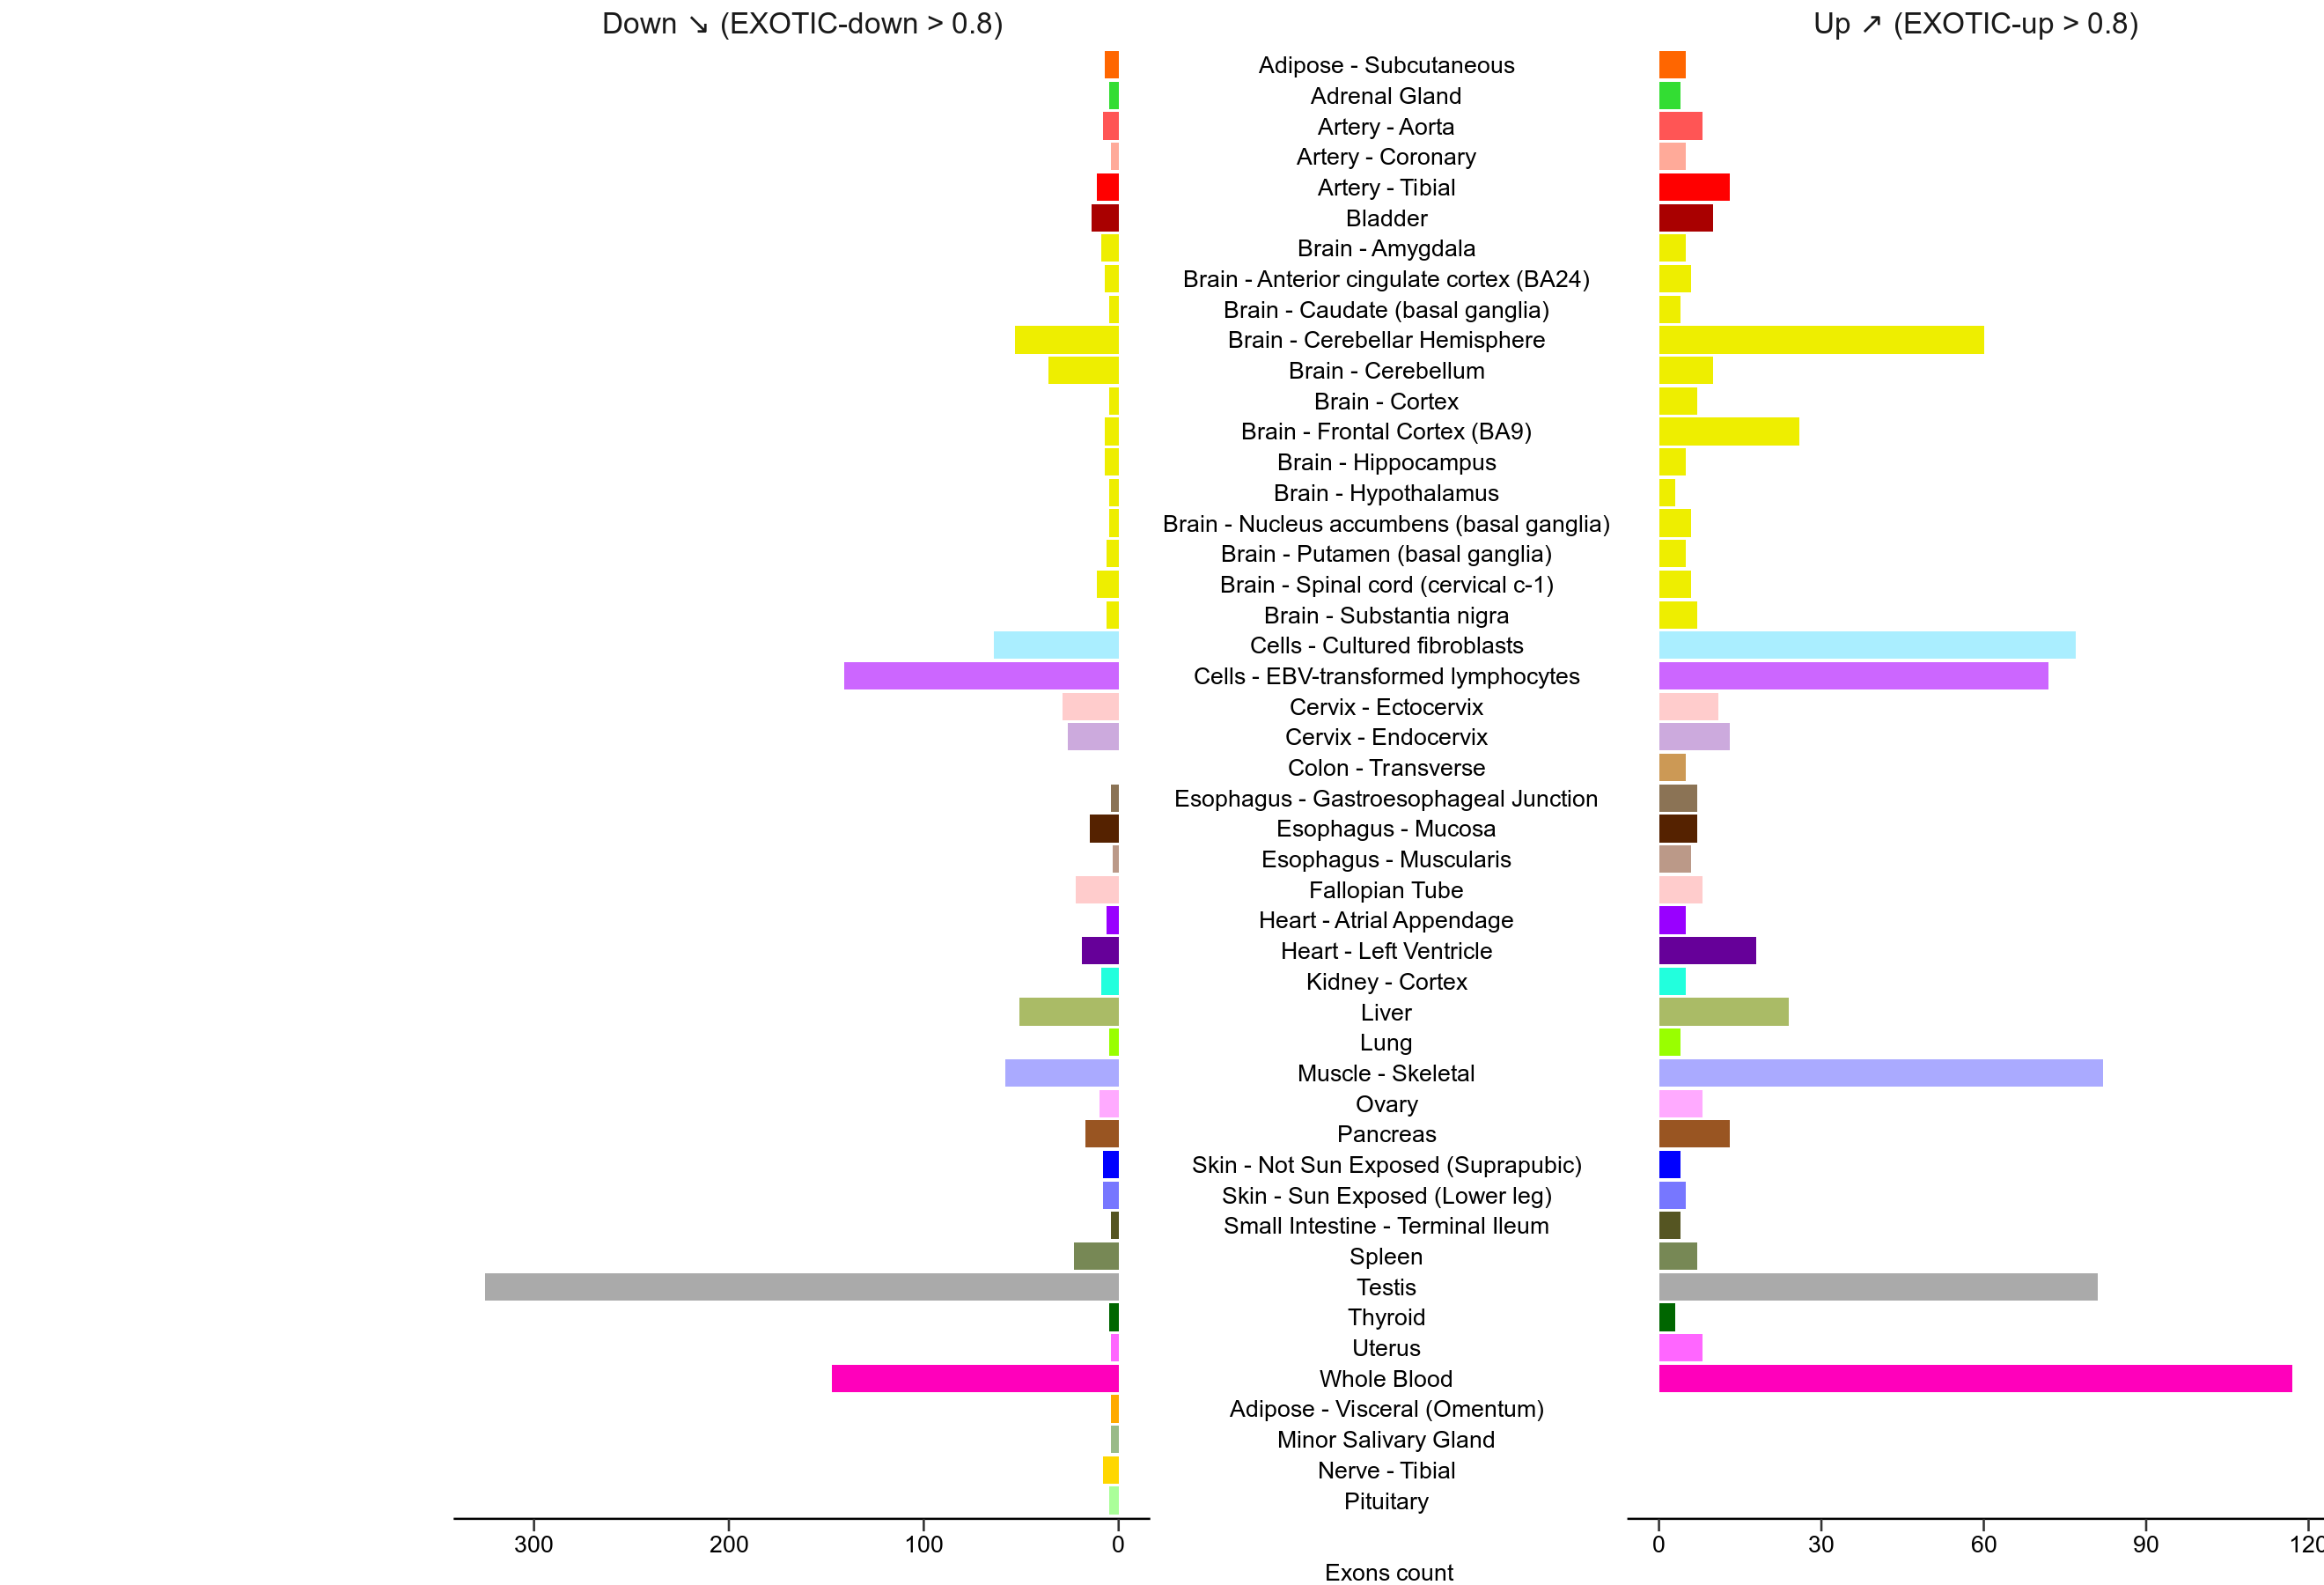

In [14]:
library(ggplot2)
library(ggpol)

options(repr.plot.width=22, repr.plot.height=15)


colors <- read_excel("/gstock/EXOTIC/data/OTHERS/gtex_colors.xlsx")
colors = colors %>% arrange(Tissue)

colors = colors[colors$Tissue %in% merge_count$Tissue ,]
# merge_count_test = merge_count %>% arrange(count.x)


p <- ggplot(merge_count, aes(x = factor(Tissue), y = count.x, fill = Tissue)) + 
    geom_bar(stat = "identity") +
    facet_share(~Type, dir = "h", scales = "free", reverse_num = TRUE) +  scale_x_discrete(limits = rev(unique(merge_count$Tissue))) +
    coord_flip() +
    labs(x = "", y = "Exons count") + 
    theme(
        legend.position = "none", 
#         axis.ticks.y = element_blank(), 
        axis.ticks.length.y = unit(0,"cm"),
        axis.ticks.length.x = unit(0.3,"cm"),
        axis.text.y = element_text(color="black", size=16), 
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        plot.margin=margin(l=0,unit="cm"), 
        panel.border = element_blank(), 
        axis.title.y=element_blank(), 
        
        axis.text.x = element_text(color="black", size=16),
        strip.background = element_rect(
     color="white", fill="white", size=1.5, linetype="solid"
     ),
        strip.text = element_text(size = 20)
               ) + 
  
    scale_fill_manual(values=colors$Color)


p

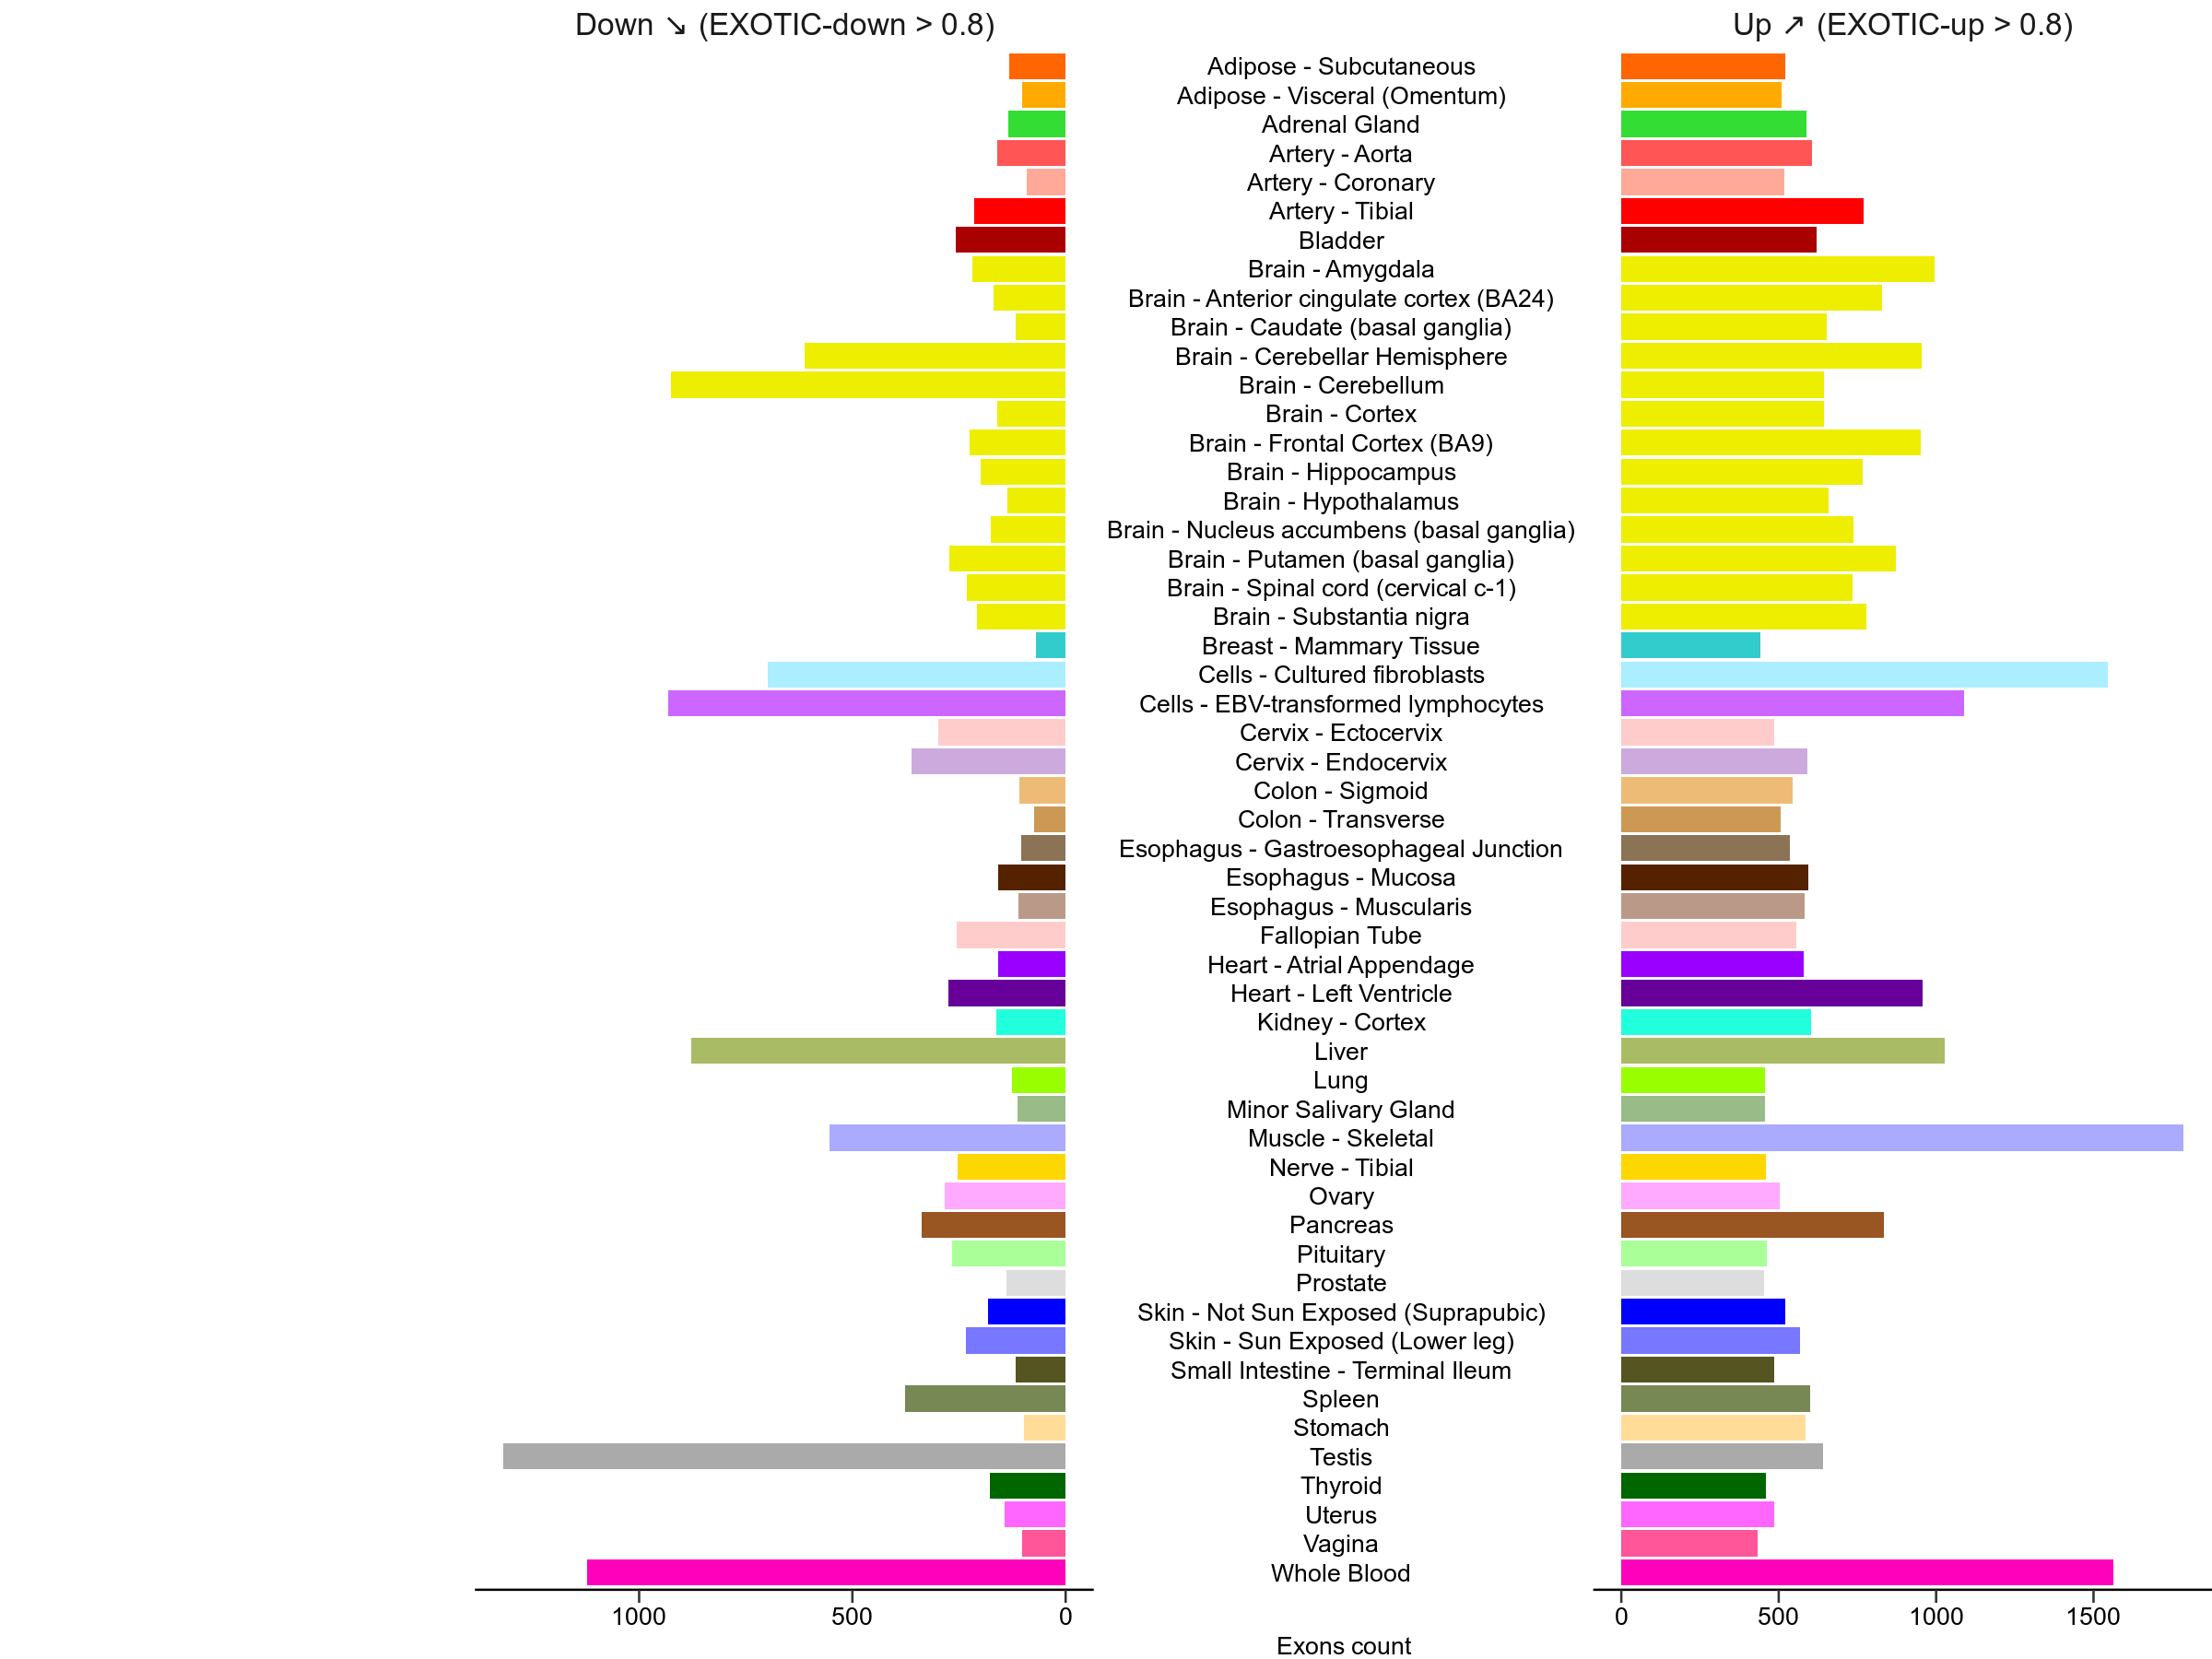

In [7]:
library(ggplot2)
library(ggpol)

options(repr.plot.width=20, repr.plot.height=15)


colors <- read_excel("/gstock/EXOTIC/data/OTHERS/gtex_colors.xlsx")
colors = colors %>% arrange(Tissue)

colors = colors[colors$Tissue %in% merge_count$Tissue ,]
# merge_count_test = merge_count %>% arrange(count.x)


p <- ggplot(merge_count, aes(x = factor(Tissue), y = count.x, fill = Tissue)) + 
    geom_bar(stat = "identity") +
    facet_share(~Type, dir = "h", scales = "free", reverse_num = TRUE) +  scale_x_discrete(limits = rev(unique(merge_count$Tissue))) +
    coord_flip() +
    labs(x = "", y = "Exons count") + 
    theme(
        legend.position = "none", 
#         axis.ticks.y = element_blank(), 
        axis.ticks.length.y = unit(0,"cm"),
        axis.ticks.length.x = unit(0.3,"cm"),
        axis.text.y = element_text(color="black", size=16), 
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        plot.margin=margin(l=0,unit="cm"), 
        panel.border = element_blank(), 
        axis.title.y=element_blank(), 
        
        axis.text.x = element_text(color="black", size=16),
        strip.background = element_rect(
     color="white", fill="white", size=1.5, linetype="solid"
     ),
        strip.text = element_text(size = 20)
               ) + 
  
    scale_fill_manual(values=colors$Color)


p

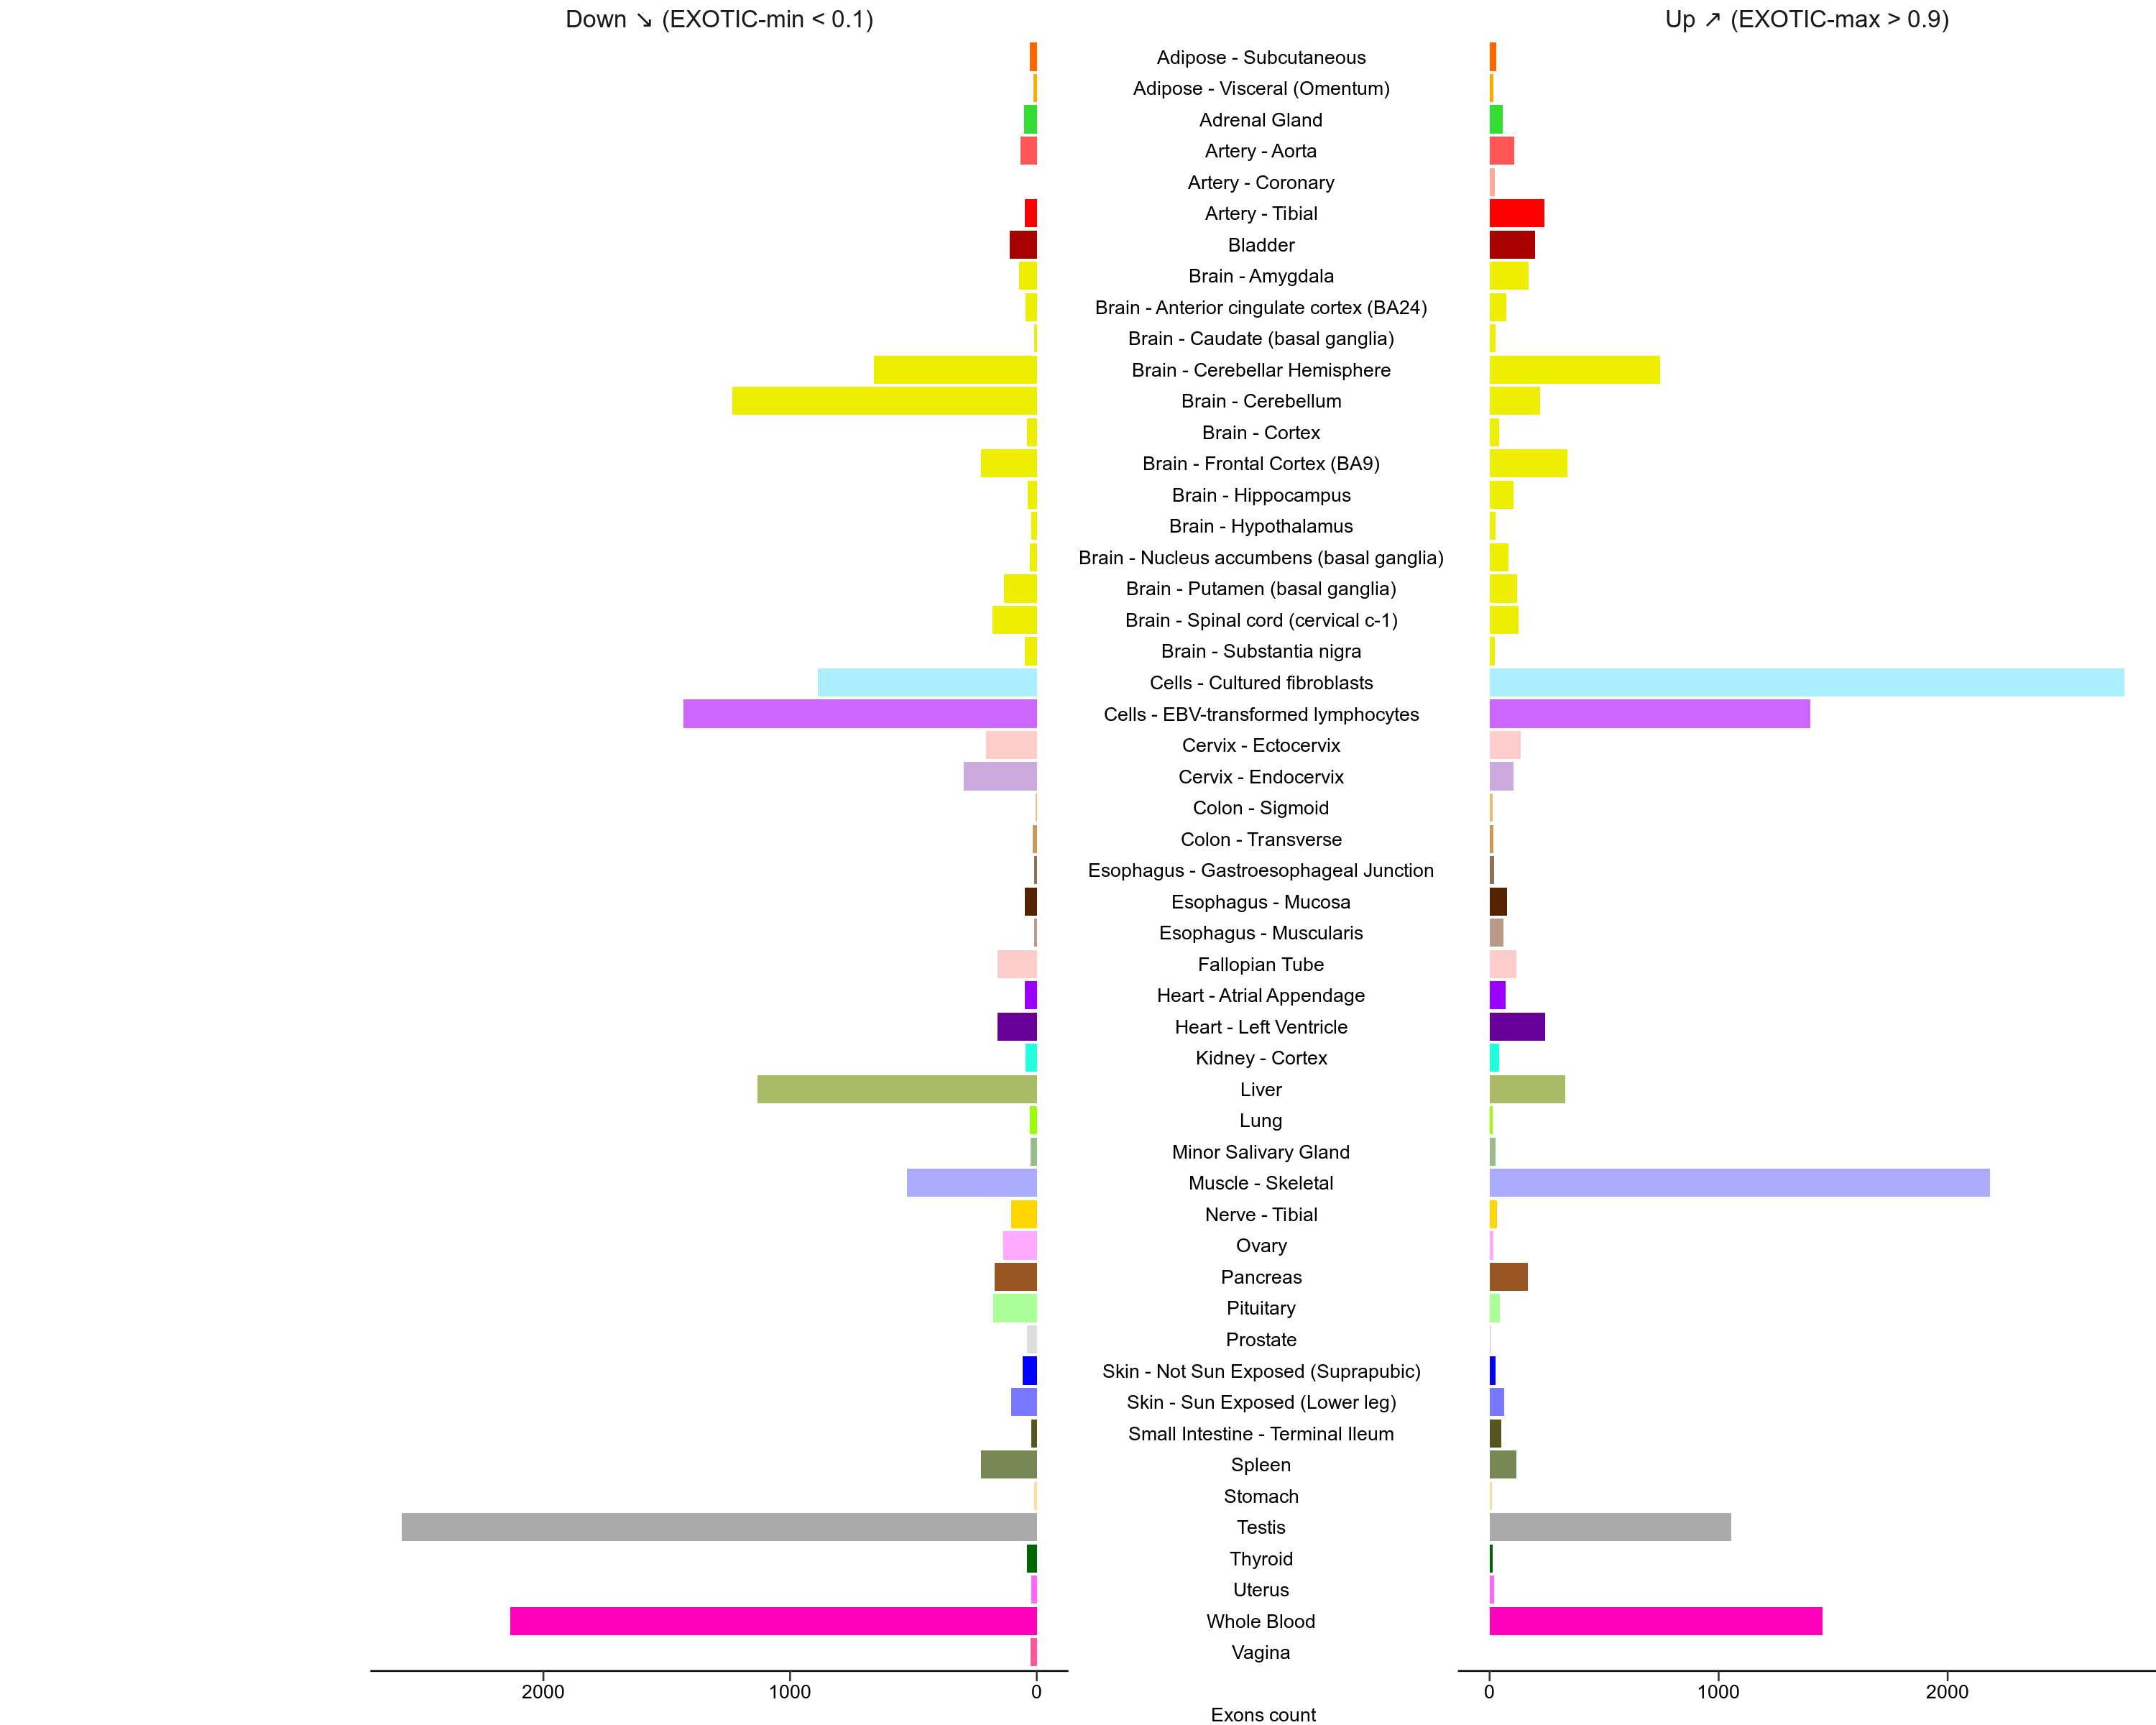

In [88]:
library(ggplot2)
library(ggpol)

colors <- read_excel("/gstock/EXOTIC/data/OTHERS/gtex_colors.xlsx")
colors = colors %>% arrange(Tissue)

colors = colors[colors$Tissue %in% merge_count$Tissue ,]
# merge_count_test = merge_count %>% arrange(count.x)


p <- ggplot(merge_count, aes(x = factor(Tissue), y = count.x, fill = Tissue)) + 
    geom_bar(stat = "identity") +
    facet_share(~Type, dir = "h", scales = "free", reverse_num = TRUE) +  scale_x_discrete(limits = rev(unique(merge_count$Tissue))) +
    coord_flip() +
    labs(x = "", y = "Exons count") + 
    theme(
        legend.position = "none", 
#         axis.ticks.y = element_blank(), 
        axis.ticks.length.y = unit(0,"cm"),
        axis.ticks.length.x = unit(0.3,"cm"),
        axis.text.y = element_text(color="black", size=16), 
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        plot.margin=margin(l=0,unit="cm"), 
        panel.border = element_blank(), 
        axis.title.y=element_blank(), 
        
        axis.text.x = element_text(color="black", size=16),
        strip.background = element_rect(
     color="white", fill="white", size=1.5, linetype="solid"
     ),
        strip.text = element_text(size = 20)
               ) + 
  
    scale_fill_manual(values=colors$Color)


p

In [33]:
df <- data.frame(age = sample(1:20, 1000, replace = TRUE), 
                 gender = c("M","F"), levels = c("M", "F"))
# Get the count per age and sex
df$count <- 1
df$age = paste(df$age, "some long string that is too long") # Added long labels
df <- aggregate(count ~ gender + age, data = df, length)

# For the horizontally shared axis, if we want to mirror the axes,
# we have to multiply the first panel by -1, and use coord_flip().
df_h <- df 
df_h$count = ifelse(df_h$gender == "F", df_h$count * -1, df_h$count)
df_h

gender,age,count
<chr>,<chr>,<dbl>
F,1 some long string that is too long,-31
M,1 some long string that is too long,20
F,10 some long string that is too long,-27
M,10 some long string that is too long,26
F,11 some long string that is too long,-23
M,11 some long string that is too long,23
F,12 some long string that is too long,-24
M,12 some long string that is too long,28
F,13 some long string that is too long,-25


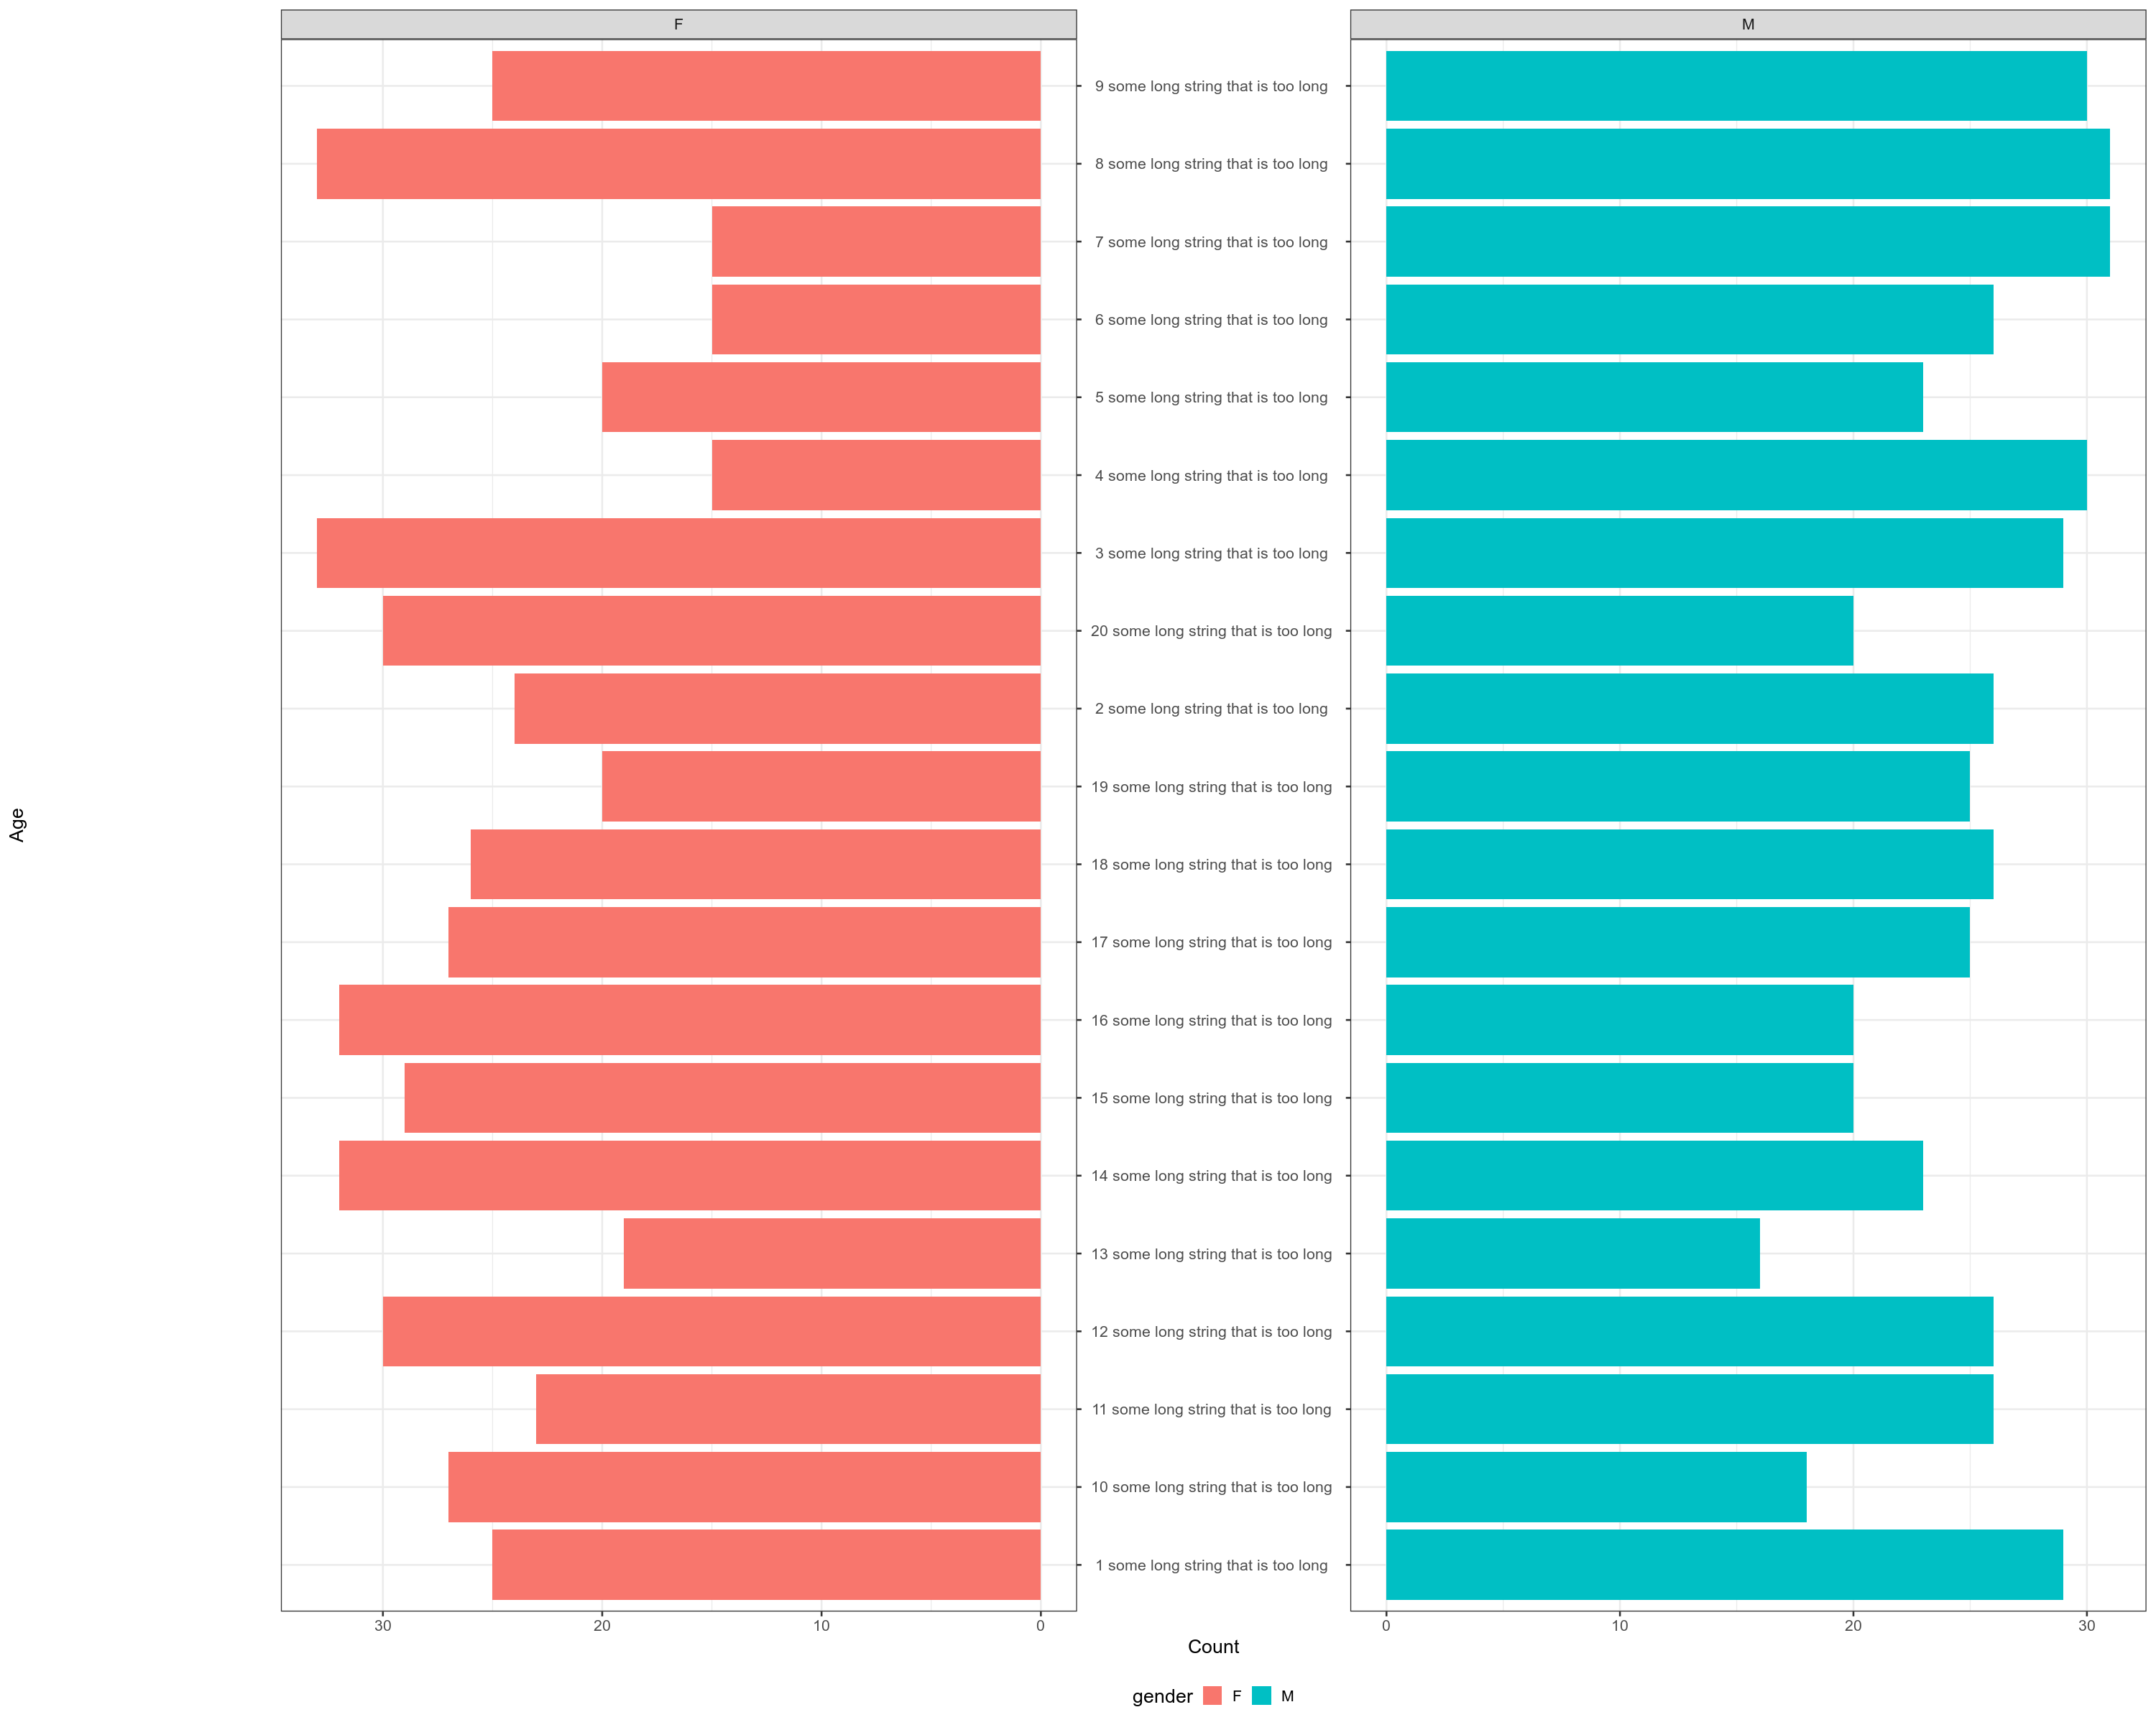

In [32]:
library(ggplot2)
library(ggpol)
df <- data.frame(age = sample(1:20, 1000, replace = TRUE), 
                 gender = c("M","F"), levels = c("M", "F"))

# Get the count per age and sex
df$count <- 1
df$age = paste(df$age, "some long string that is too long") # Added long labels
df <- aggregate(count ~ gender + age, data = df, length)

# For the horizontally shared axis, if we want to mirror the axes,
# we have to multiply the first panel by -1, and use coord_flip().
df_h <- df 
df_h$count = ifelse(df_h$gender == "F", df_h$count * -1, df_h$count)

p <- ggplot(df_h, aes(x = factor(age), y = count, fill = gender)) + 
  geom_bar(stat = "identity") +
  facet_share(~gender, dir = "h", scales = "free", reverse_num = TRUE) + 
  coord_flip() +
  labs(x = "Age", y = "Count") + 
  theme(legend.position = "bottom")

p